# Load the Preprocessed Data

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
train = pd.read_csv('Train_Data.csv')
train_labels = pd.read_csv('Train_Labels.csv')
test = pd.read_csv('Test_Data.csv')
test_labels = pd.read_csv('Test_Labels.csv')
original_dataset = pd.concat([train, test])
original_dataset = original_dataset.reset_index()

labels = pd.concat([train_labels, test_labels])
labels = labels.reset_index()
# Transpose the dataset
transposed_dataset =original_dataset
labels.drop('index', axis = 1,inplace = True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transposed_dataset, labels, test_size=0.3, random_state=42)


# Feature Selection using K-Means

In [ ]:
# Use SelectKBest with ANOVA F-statistic as the scoring function
num_features_to_select = 40  # Adjust as needed
feature_selector = SelectKBest(f_classif, k=num_features_to_select)

# Fit and transform the training data to keep only the selected features
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Transform the testing data to keep only the selected features
X_test_selected = feature_selector.transform(X_test)

# Display the shape of the selected feature datasets
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shape of X_train_selected: (7209, 40)
Shape of X_test_selected: (3090, 40)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_train and y_train are your training data and labels
# You should replace these with your actual data

# Create SelectKBest instance
num_features_to_select = 10
feature_selector = SelectKBest(f_classif, k=num_features_to_select)

# Fit and transform the training data to keep only the selected features
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support()

# Get the original feature names
original_feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Get the names of the selected features
selected_feature_names = original_feature_names[selected_feature_indices]

# Transform the testing data to keep only the selected features
X_test_selected = feature_selector.transform(X_test)

# Display the shape and names of the selected feature datasets
print("Shape of X_train_selected:", X_train_selected.shape)
print("Selected Feature Names:")
print(selected_feature_names)
print("Shape of X_test_selected:", X_test_selected.shape)



Shape of X_train_selected: (7209, 10)
Selected Feature Names:
Index(['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'tGravityAcc-min()-X',
       'tGravityAcc-energy()-X', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerkMag-entropy()', 'fBodyAcc-entropy()-X',
       'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y',
       'fBodyBodyAccJerkMag-entropy()'],
      dtype='object')
Shape of X_test_selected: (3090, 10)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


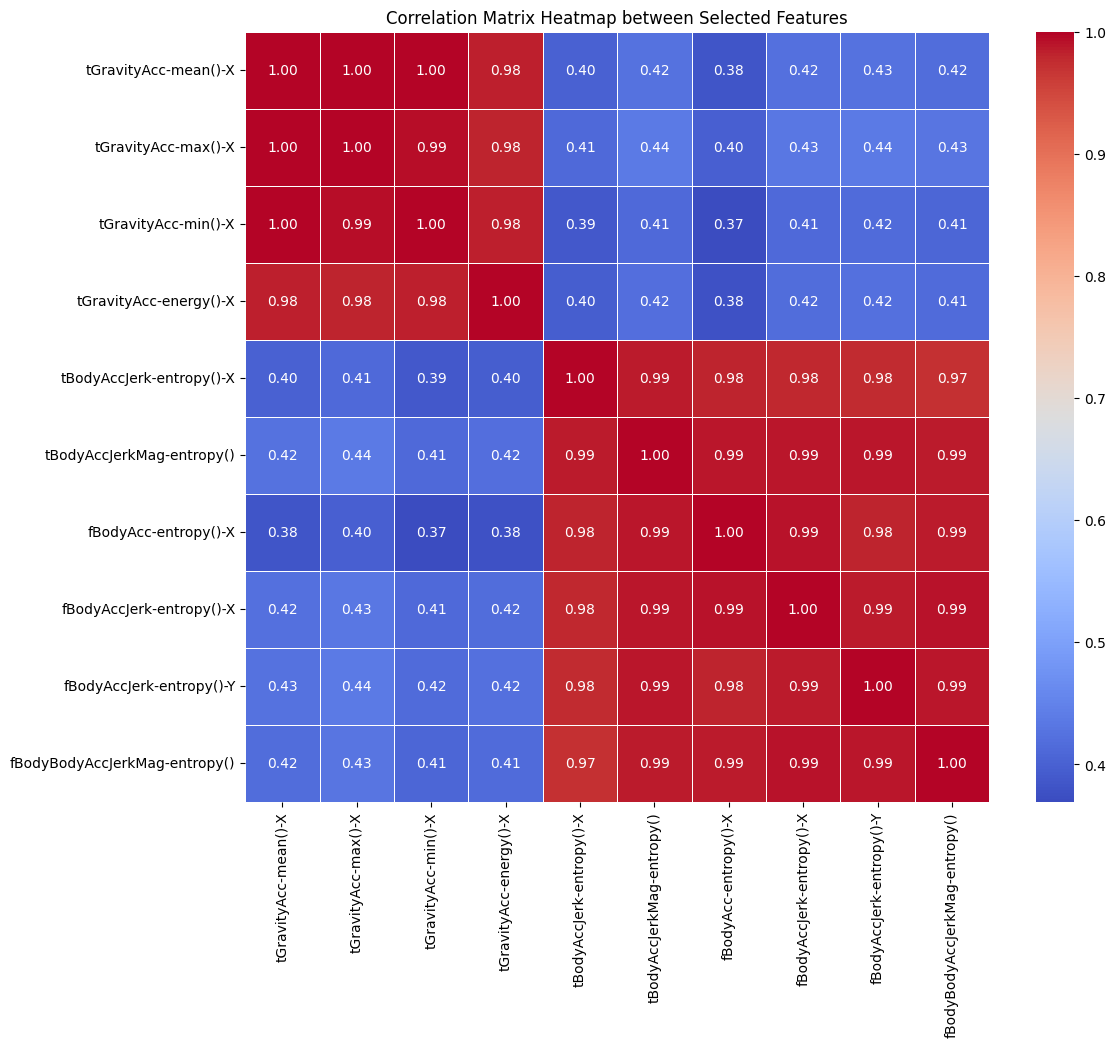

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train_selected is a NumPy array with the selected features
# Replace this with your actual data

# Convert the NumPy array to a pandas DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)

# Get the correlation matrix
correlation_matrix = X_train_selected_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap between Selected Features")
plt.show()




# Transform data and Initialise classifiers and folds

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_selected)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test_selected)

# Flatten the labels using ravel()
y_train_flat = y_train.values.ravel()
y_test_flat = y_test.values.ravel()

# Initialize Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Initialize SVM classifier
svm_classifier = SVC()

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

#10 fold cross validation
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Gaussian Naive Bayes

In [ ]:
#for GaussianNB
cv_scores1 = cross_val_score(naive_bayes_classifier, X_train_scaled, y_train_flat, cv=k_fold, scoring='accuracy')
y_pred_cv1 = cross_val_predict(naive_bayes_classifier, X_train_scaled, y_train_flat, cv=k_fold)
# Display the accuracy for each fold
for i, score in enumerate(cv_scores1, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the mean and standard deviation of the cross-validation scores
print(f'Mean Accuracy of GaussianNB: {np.mean(cv_scores1)}')
print(f'Standard Deviation of GaussianNB: {np.std(cv_scores1)}')


Fold 1: Accuracy = 0.7891816920943134
Fold 2: Accuracy = 0.7794729542302358
Fold 3: Accuracy = 0.7739251040221914
Fold 4: Accuracy = 0.7808599167822469
Fold 5: Accuracy = 0.7836338418862691
Fold 6: Accuracy = 0.8002773925104022
Fold 7: Accuracy = 0.7919556171983356
Fold 8: Accuracy = 0.8183079056865464
Fold 9: Accuracy = 0.79750346740638
Fold 10: Accuracy = 0.7861111111111111
Mean Accuracy of GaussianNB: 0.7901229002928033
Standard Deviation of GaussianNB: 0.012149159997332274


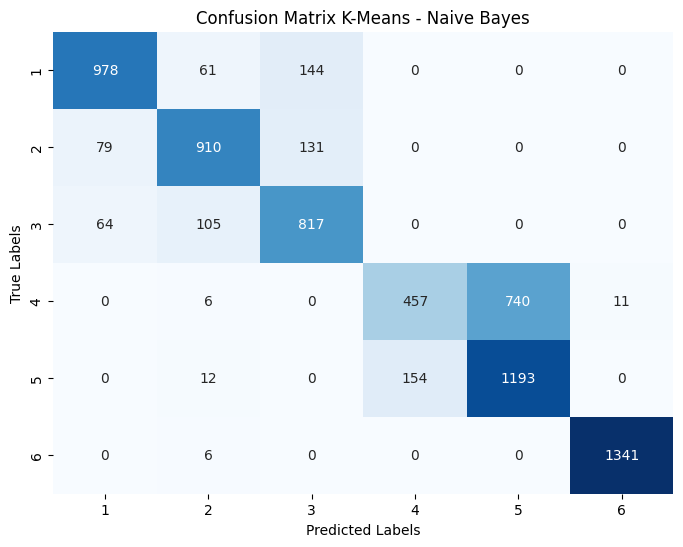

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_flat, y_pred_cv1)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_train_flat), yticklabels=np.unique(y_train_flat))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix K-Means - Naive Bayes')
plt.show()

# Support Vector Classifier (SVC)

In [ ]:
#for SVC
cv_scores2 = cross_val_score(svm_classifier, X_train_scaled, y_train_flat, cv=k_fold, scoring='accuracy')
y_pred_cv2 = cross_val_predict(svm_classifier, X_train_scaled, y_train_flat, cv=k_fold)
# Display the accuracy for each fold
for i, score in enumerate(cv_scores2, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the mean and standard deviation of the cross-validation scores
print(f'Mean Accuracy of SVC: {np.mean(cv_scores2)}')
print(f'Standard Deviation OF SVC: {np.std(cv_scores2)}')


Fold 1: Accuracy = 0.912621359223301
Fold 2: Accuracy = 0.9098474341192788
Fold 3: Accuracy = 0.9181692094313454
Fold 4: Accuracy = 0.9167822468793343
Fold 5: Accuracy = 0.9001386962552012
Fold 6: Accuracy = 0.9070735090152566
Fold 7: Accuracy = 0.9181692094313454
Fold 8: Accuracy = 0.9209431345353676
Fold 9: Accuracy = 0.912621359223301
Fold 10: Accuracy = 0.9083333333333333
Mean Accuracy of SVC: 0.9124699491447064
Standard Deviation OF SVC: 0.0060047506808798825


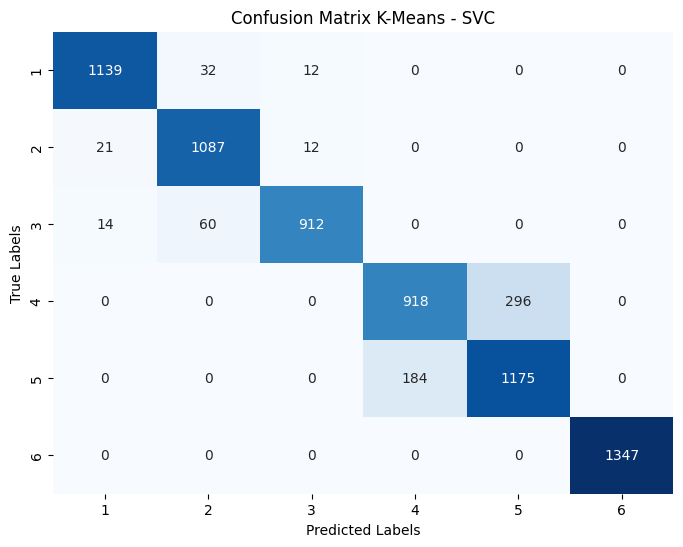

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_flat, y_pred_cv2)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_train_flat), yticklabels=np.unique(y_train_flat))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix K-Means - SVC')
plt.show()

# Logistic Regression

In [ ]:
#for Logistic Regression
cv_scores3 = cross_val_score(logreg_classifier, X_train_scaled, y_train_flat, cv=k_fold, scoring='accuracy')
y_pred_cv3 = cross_val_predict(logreg_classifier, X_train_scaled, y_train_flat, cv=k_fold)
# Display the accuracy for each fold
for i, score in enumerate(cv_scores3, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the mean and standard deviation of the cross-validation scores
print(f'Mean Accuracy of Logistic Regression: {np.mean(cv_scores3)}')
print(f'Standard Deviation OF Logistic Regression: {np.std(cv_scores3)}')


Fold 1: Accuracy = 0.9334257975034674
Fold 2: Accuracy = 0.9403606102635229
Fold 3: Accuracy = 0.9445214979195562
Fold 4: Accuracy = 0.9320388349514563
Fold 5: Accuracy = 0.9278779472954231
Fold 6: Accuracy = 0.9306518723994452
Fold 7: Accuracy = 0.9514563106796117
Fold 8: Accuracy = 0.9472954230235784
Fold 9: Accuracy = 0.9445214979195562
Fold 10: Accuracy = 0.9305555555555556
Mean Accuracy of Logistic Regression: 0.9382705347511173
Standard Deviation OF Logistic Regression: 0.007910165278384727


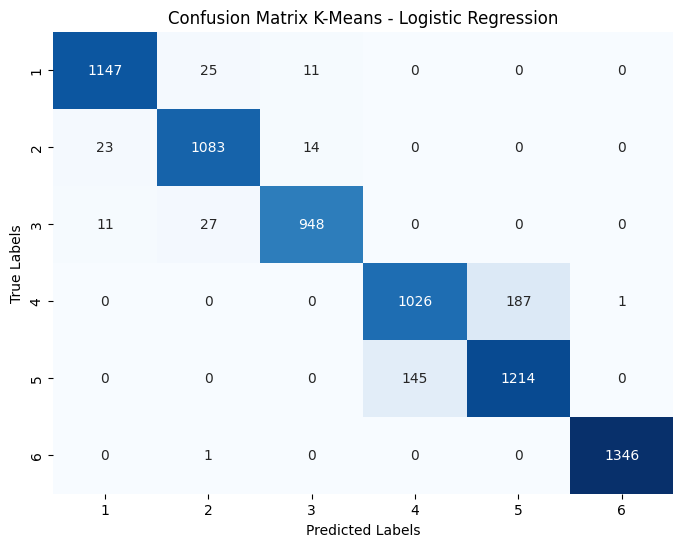

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_flat, y_pred_cv3)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_train_flat), yticklabels=np.unique(y_train_flat))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix K-Means - Logistic Regression')
plt.show()